In [20]:
import pandas as pd
from csv import DictReader
from csv import StringIO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
data = pd.read_csv("bezigrad.txt")

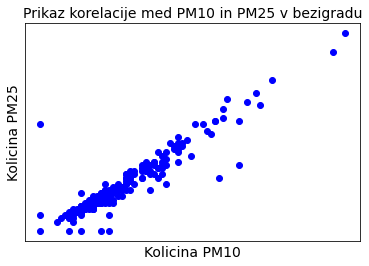

In [22]:
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.xlabel('Kolicina PM10', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['PM10bezigrad'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med PM10 in PM25 v bezigradu', fontsize=14)
plt.show()

Med PM10 in PM25 je močna korelacija kot pričakovano.

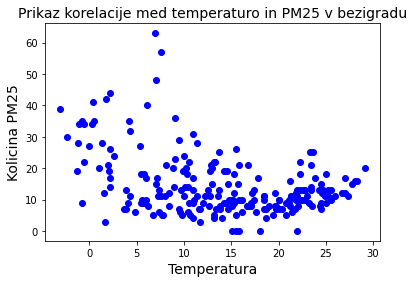

In [23]:
plt.xlabel('Temperatura', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['povpdnevnaT'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med temperaturo in PM25 v bezigradu', fontsize=14)
plt.show()

Korelacija med temperaturo in onesnaženostjo je precej očitna. Po moje je temu tako zaradi ogrevanja.

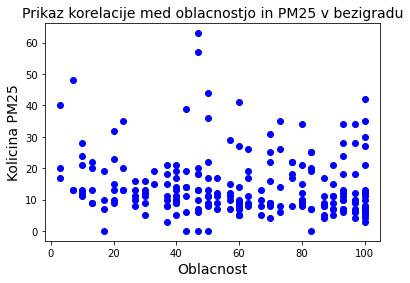

In [31]:
plt.xlabel('Oblacnost', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['oblacnost'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med oblacnostjo in PM25 v bezigradu', fontsize=14)
plt.show()

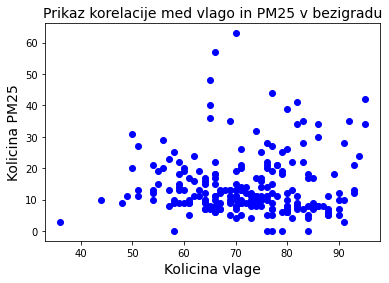

In [32]:
plt.xlabel('Kolicina vlage', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['povpvlaga'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med vlago in PM25 v bezigradu', fontsize=14)
plt.show()

Med količino vlage in oblačnostjo iz grafov ne morem razbrati očitne korelacije.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x27182BB0>]],
      dtype=object)

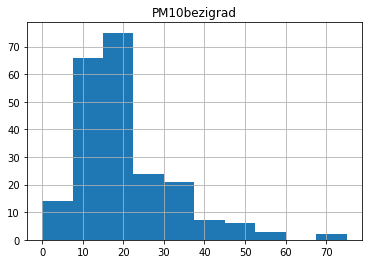

In [26]:
df = pd.DataFrame(data=data)
df.hist(column='PM10bezigrad')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x01110688>]],
      dtype=object)

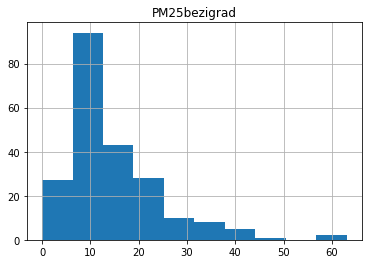

In [27]:

df = pd.DataFrame(data=data)
df.hist(column='PM25bezigrad')


c:\users\jakob\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\jakob\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\jakob\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x01602748>,
      dtype=object)

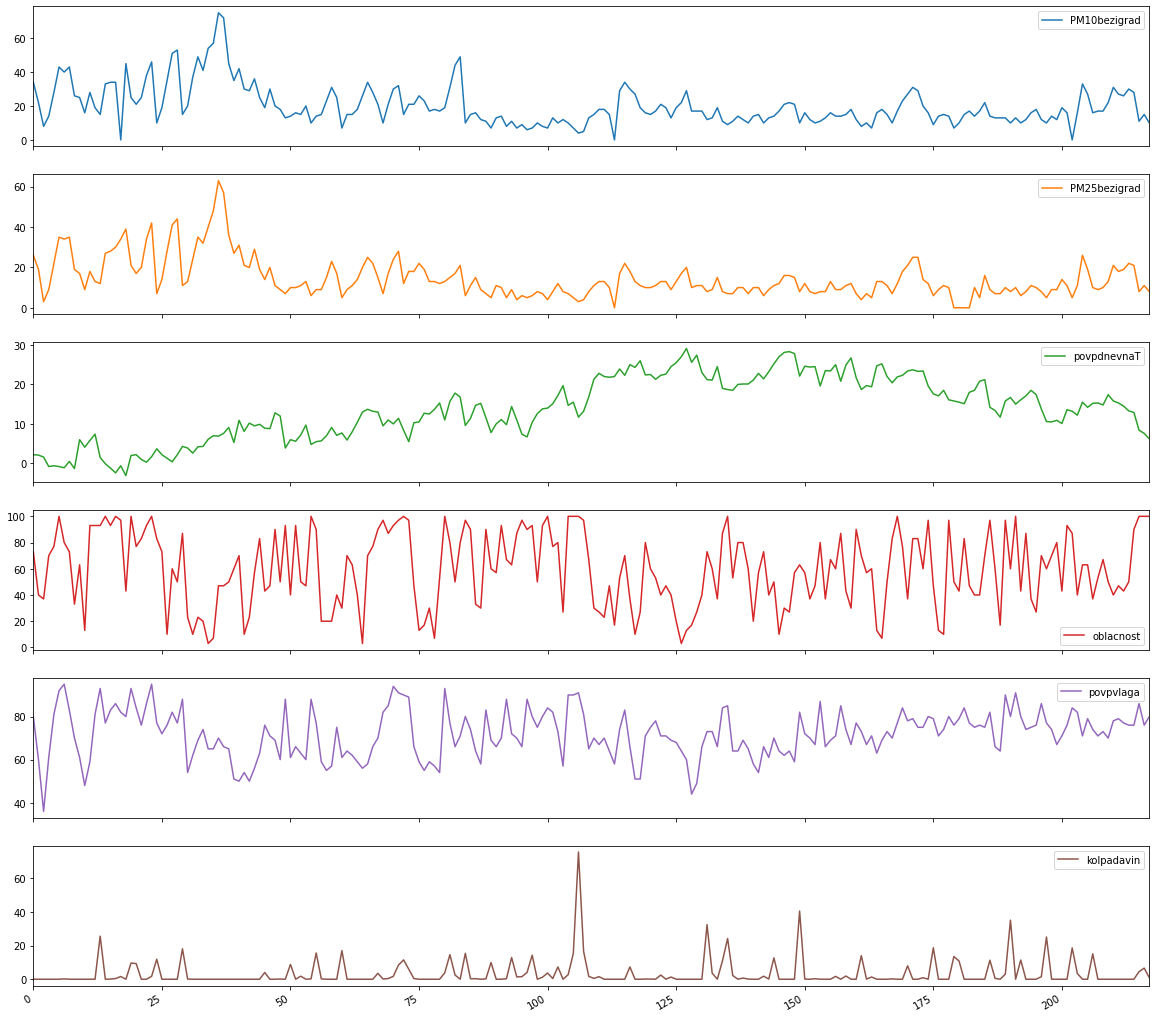

In [28]:
df.plot.line(subplots=True,figsize=(20,20))

In [29]:
df.loc[df['PM10bezigrad']>60]

,datum,PM10bezigrad,PM25bezigrad,povpdnevnaT,oblacnost,povpvlaga,kolpadavin,padavine
36,20.02.2019,75.0,63,6.9,47,70,0.0,ne
37,21.02.2019,72.0,57,7.6,47,66,0.0,ne


20.2 in 21.2 sta osamelca. Takrat je bila onesnaženost največja